<a href="https://colab.research.google.com/github/SubhamZap/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# **Business Problem Analysis**

Indian cuisine consists of a variety of regional and traditional cuisines native to the Indian subcontinent. With every state, you can find something different to love. Besides traditional North Indian and South Indian food, the food culture is heavily inspired by and evolved around various civilizations. To say that Indians are food lovers would be an understatement. The restaurant business in India has been booming and people even like to celebrate small occasions of their lives with good food and great ambiance. The number of restaurant are increasing day by day. This industry hasn't been saturated yet. And new restaurants are opening every day. However it has become difficult for them to compete with already established restaurants. The key issues that continue to pose a challenge to them include high real estate costs, rising food costs, shortage of quality manpower, fragmented supply chain and over-licensing. This Zomato data aims at analysing demography of the location. Most importantly it will help new restaurants in deciding their theme, menus, cuisine, cost etc for a particular location. The dataset also contains reviews for each of the restaurant which will help in finding overall rating for the place.

In this notebook I will try analyzing the Buisness Problem of Zomato and create a practical recommendation system for users.

The problem statement here has two datasets for us to work on:



*   Zomato Restaurant Names and Metadata

*   Zomato Restaurant Reviews


To assure Zomato's success it is important for the company to analyze its datasets and make appropriate strategic decisions. The problem statement here asks us to cluster the restaurants to help customers find the best restaurants in their city and according to their taste and understand the fields they are lagging in. This will help Zomato in building a good recommendation system for their customers. Do a cost-benefit analysis using the cuisines and costs of the restaurants. In order to understand fields that need to be worked upon, it is important to do sentiment analysis to get an idea about how people really feel about a particular restaurant. To identify the industry critics and especially work on their reviews to build a reputation worth praising.

In [240]:
# Importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [242]:
# Loading metadata dataset

meta_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant Clustering and Sentiment Analysis/Zomato Restaurant names and Metadata.csv')
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [243]:
# Loading review dataset

review_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant Clustering and Sentiment Analysis/Zomato Restaurant reviews.csv')
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [244]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [245]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [246]:
meta_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [247]:
review_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


# **Data Cleaning**

In [248]:
# Checking for null values in meta_df

meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Dropping null values in collections means we will be losing half of the observations, so we won't be removing null values. Instead we can remove the column 'collection' as we won't make any significant impact in our analysis. 

Timings have one null value which could be dropped.

In [249]:
# Dropping collections and null value from Timings

meta_df.drop(['Collections'], axis= 1, inplace= True)
meta_df.dropna(inplace = True)
meta_df.isnull().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64

In [250]:
# Checking for null values in review_df

review_df.isna().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [251]:
# Dropping null values in reviews_df

review_df.dropna(axis = 0, inplace= True)

In [252]:
# Checking again

review_df.isna().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [253]:
review_df.shape

(9955, 7)

So, not much data is lost.

In [254]:
# Checking for duplicate values in meta_df

meta_df[meta_df.duplicated()]

,Name,Links,Cost,Cuisines,Timings


In [255]:
# Dropping all duplicated values

review_df.drop_duplicates(inplace= True)

In [256]:
# Checking for duplicate values in review_df

review_df[review_df.duplicated()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures


In [257]:
review_df.shape

(9955, 7)

Now, all the null and duplicate values have been removed.

# **Feature Engineering**

## Meta_df

In [258]:
# Changing all column names to lowercase

meta_df.columns = meta_df.columns.str.lower()

In [259]:
meta_df.columns

Index(['name', 'links', 'cost', 'cuisines', 'timings'], dtype='object')

In [260]:
# Value count for cost

meta_df.cost.value_counts

<bound method IndexOpsMixin.value_counts of 0        800
1        800
2      1,300
3        800
4      1,200
       ...  
100      600
101      200
102      500
103      250
104    1,700
Name: cost, Length: 104, dtype: object>

In [261]:
# Change the data type of cost

meta_df.cost = meta_df.cost.str.replace(",","").astype('int64')

In [262]:
meta_df.cost

0       800
1       800
2      1300
3       800
4      1200
       ... 
100     600
101     200
102     500
103     250
104    1700
Name: cost, Length: 104, dtype: int64

We can drop links column as it won't be very helpful in data analysis

In [263]:
# Dropping links column

meta_df.drop(['links'], axis= 1, inplace= True)

In [264]:
meta_df.shape

(104, 4)

In [265]:
meta_df.cuisines[0:5]

0    Chinese, Continental, Kebab, European, South I...
1                       Biryani, North Indian, Chinese
2         Asian, Mediterranean, North Indian, Desserts
3    Biryani, North Indian, Chinese, Seafood, Bever...
4    Asian, Continental, North Indian, Chinese, Med...
Name: cuisines, dtype: object

In [266]:
# cuisine column converted to list

meta_df['cuisines'] = meta_df['cuisines'].str.replace(' ','')
meta_df['cuisines'] = meta_df['cuisines'].str.split(',')

In [267]:
meta_df['cuisines']

0      [Chinese, Continental, Kebab, European, SouthI...
1                        [Biryani, NorthIndian, Chinese]
2          [Asian, Mediterranean, NorthIndian, Desserts]
3      [Biryani, NorthIndian, Chinese, Seafood, Bever...
4      [Asian, Continental, NorthIndian, Chinese, Med...
                             ...                        
100                                    [FastFood, Salad]
101                                     [Bakery, Mithai]
102                      [NorthIndian, Biryani, Chinese]
103                                           [FastFood]
104                    [Thai, Asian, Chinese, Malaysian]
Name: cuisines, Length: 104, dtype: object

In [268]:
meta_df.timings.unique()

array(['12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)', '11 AM to 11 PM',
       '11:30 AM to 4:30 PM, 6:30 PM to 11 PM', '12 Noon to 2 AM',
       '12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)',
       '12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30PM (Mon, Tue, Wed, Thu, Sun), 12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 12Midnight (Fri-Sat)',
       '7 AM to 10 PM', '12 Noon to 12 Midnight',
       '10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri-Sun)',
       '12 Noon to 3:30 PM, 7 PM to 10:30 PM',
       '12 Noon to 3:30 PM, 6:30 PM to 11:30 PM', '11:30 AM to 1 AM',
       '12noon to 12midnight (Mon-Sun)',
       '12 Noon to 4:30 PM, 6:30 PM to 11:30 PM', '12 Noon to 10:30 PM',
       '12 Noon to 11 PM', '12:30 PM to 10 PM (Tue-Sun), Mon Closed',
       '11:30 AM to 3 PM, 7 PM to 11 PM',
       '11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11am to 12midnight (Fri-Sat)',
       '10 AM to 5 AM',
       '12 Noon to 12 Midnight (Mon-Thu, Sun), 12 Noon to 1 AM (Fri-S

Upon analyzing the unique values in the timings columns, it can be concluded that the restaurants are more or less open at the same timings and don't really provide a considerable variation in order to cluster the restaurants.

In [269]:
# Dropping timings column

meta_df.drop(['timings'], axis= 1, inplace= True)

In [270]:
meta_df.head()

,name,cost,cuisines
0,Beyond Flavours,800,"[Chinese, Continental, Kebab, European, SouthI..."
1,Paradise,800,"[Biryani, NorthIndian, Chinese]"
2,Flechazo,1300,"[Asian, Mediterranean, NorthIndian, Desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"[Biryani, NorthIndian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,1200,"[Asian, Continental, NorthIndian, Chinese, Med..."


## **Review_df**

In [271]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [272]:
# Changing all column names to lowercase

review_df.columns = review_df.columns.str.lower()

In [273]:
review_df.columns

Index(['restaurant', 'reviewer', 'review', 'rating', 'metadata', 'time',
       'pictures'],
      dtype='object')

In [274]:
review_df.rating.value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: rating, dtype: int64

One rating is a string type ('Like'), we can assign it to mean value

In [275]:
# Assign like value to mean value of rating

review_df['rating'] = review_df['rating'].str.replace('Like', '4')
review_df['rating'] = review_df['rating'].astype('float64')

In [276]:
# Time column expanded to year, month, day and hour of the day

review_df['time'] = pd.to_datetime(review_df['time'])
review_df['year'] = pd.DatetimeIndex(review_df['time']).year
review_df['month'] = pd.DatetimeIndex(review_df['time']).month
review_df['day'] = pd.DatetimeIndex(review_df['time']).day
review_df['hour'] = pd.DatetimeIndex(review_df['time']).hour

In [277]:
# Dropping time column

review_df.drop(['time'], axis= 1, inplace= True)

In [278]:
# Exploding metadata column into followers and no. of review columns

review_df['review_number'],review_df['followers']=review_df['metadata'].str.split(',').str
review_df['review_number'] = pd.to_numeric(review_df['review_number'].str.split(' ').str[0])
review_df['followers'] = pd.to_numeric(review_df['followers'].str.split(' ').str[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  This is separate from the ipykernel package so we can avoid doing imports until


In [279]:
# Drop metdata column

review_df.drop(['metadata'], axis=1, inplace=True)

In [280]:
review_df.head()

,restaurant,reviewer,review,rating,pictures,year,month,day,hour,review_number,followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,2019,5,25,15,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,2019,5,25,14,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2019,5,24,22,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,2019,5,24,22,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,2019,5,24,21,3,2.0


# **Exploratory Data Analysis**

## meta_df

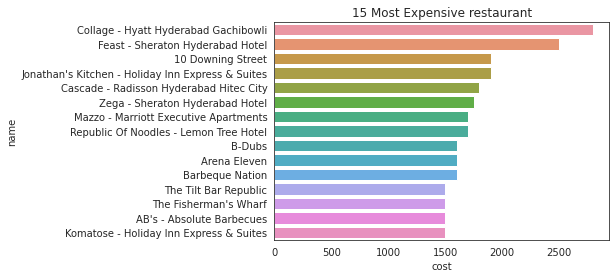

In [281]:
# checking for most expensive Restaurant
sns.barplot(x='cost',
            y="name", 
            data=meta_df, 
            order=meta_df.sort_values('cost',ascending=False).name[:15])

plt.title('15 Most Expensive restaurant')
plt.show()

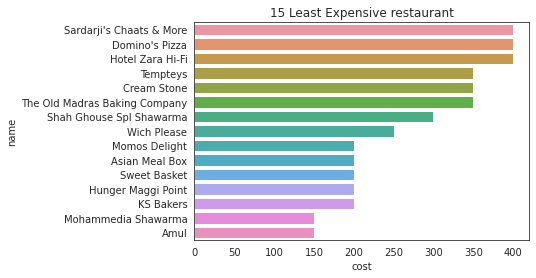

In [282]:
# checking for least expensive Restaurant
sns.barplot(x='cost',
            y="name", 
            data=meta_df, 
            order=meta_df.sort_values('cost',ascending=False).name[-15:])

plt.title('15 Least Expensive restaurant')
plt.show()

In [283]:
#  Creating sparse matrix for cuisine and joining it to meta_df

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

meta_df = meta_df.join(pd.DataFrame.sparse.from_spmatrix(
    
           mlb.fit_transform(meta_df.pop('cuisines')), 
           index=meta_df.index, columns=mlb.classes_ )
                                                        )
meta_df.head()

,name,cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,...,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Paradise,800,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,Flechazo,1300,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,1200,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [285]:
# Most famous cuisine

meta_df.drop(['name','cost'],axis = 1).sum().sort_values(ascending=False)

NorthIndian      60
Chinese          43
Continental      21
Biryani          16
Asian            15
FastFood         15
Italian          14
Desserts         13
SouthIndian       8
Bakery            7
Mughlai           6
American          6
Cafe              6
Kebab             6
Mediterranean     5
Burger            5
Beverages         5
Andhra            5
Salad             5
Momos             4
European          4
Hyderabadi        4
Seafood           4
Sushi             4
Thai              3
StreetFood        2
ModernIndian      2
Japanese          2
IceCream          2
FingerFood        2
BBQ               2
Arabian           2
Mexican           1
Mithai            1
Malaysian         1
Lebanese          1
Juices            1
NorthEastern      1
Indonesian        1
Pizza             1
HealthyFood       1
Goan              1
Spanish           1
Wraps             1
dtype: int64

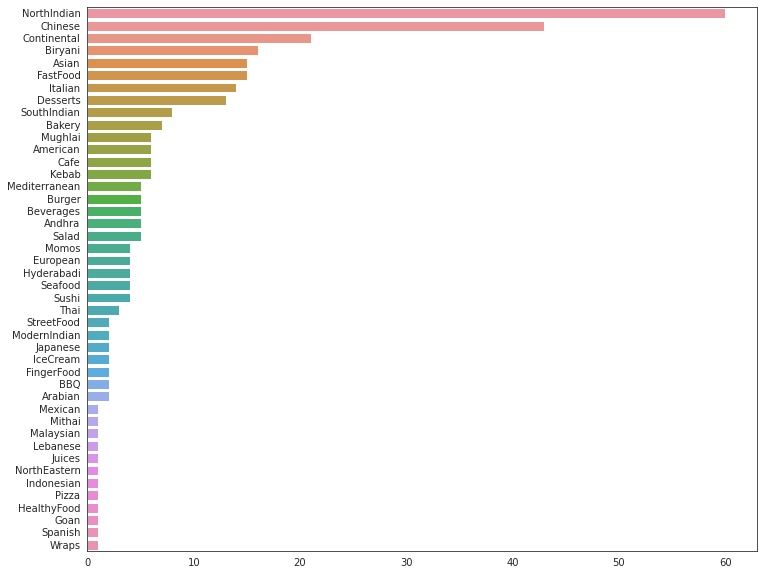

In [286]:
# Most famous cuisine

plt.figure(figsize = (12,10))
sns.barplot(y = meta_df.drop(['name','cost'],axis = 1).sum().sort_values(ascending=False).index,
            x = meta_df.drop(['name','cost'],axis = 1).sum().sort_values(ascending=False))

Findings:


1.   Customers can choose between different restaurants based on their spending power.
2.   Most customers prefer North Indian and Chinese cuisines.

